In [2]:
import numpy as np
import pandas as pd

In [3]:
import pandas as pd
df = pd.read_json('vis(3) copy.json')
print(df)

    gamma  delta    T  z_with_watermark  ppl_with_watermark
0     0.1      5    0             0.000              3.2874
1     0.1      5   10             0.860              1.7580
2     0.1      5   20             1.200              2.3337
3     0.1      5   30             1.300              3.0147
4     0.1      5   40             1.600              1.2613
..    ...    ...  ...               ...                 ...
95    0.9      5  150            19.230              1.5747
96    0.9      5  160            19.850              1.7619
97    0.9      5  170            19.232              2.6225
98    0.9      5  180            19.320              2.6225
99    0.9      5  190            19.780              2.6225

[100 rows x 5 columns]


In [4]:
sensitive_analysis = pd.read_csv('file.txt', delimiter=' ',header = None) 
print(sensitive_analysis)

      0    1  2   3   4
0  0.10  0.5  1   1   9
1  0.10  0.5  2   2   2
2  0.10  0.5  3   3   7
3  0.10  0.5  4   4   5
4  0.10  0.5  5   5   6
5  0.10  0.5  6   6  10
6  0.25  1.0  1   1   9
7  0.25  1.0  2   4   3
8  0.25  1.0  3   9   6
9  0.25  1.0  4  16   3


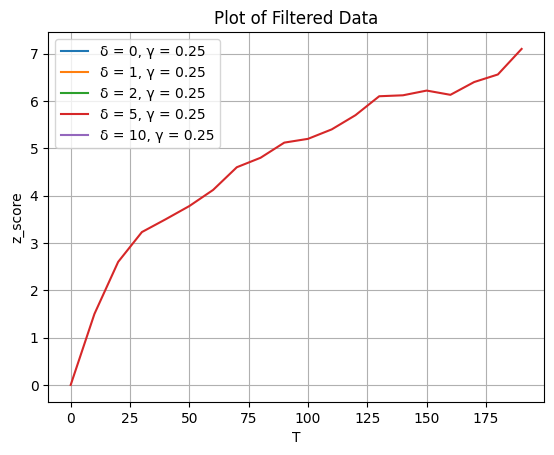

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 df 是你的 DataFrame，包含四列数据

# 提取两列满足特定条件的数据
delta_list = [0,1,2,5,10]
gamma_list =[0.1,0.25,0.5,0.75,0.9]
# for i in delta_list:
#     for j in gamma_list:
#         filtered_df = df[(df.iloc[:, 1] == i) & (df.iloc[:, 0]== j)]
#         x = filtered_df.iloc[:, 3]
#         y = filtered_df.iloc[:, 2]
#         print(x)
#         plt.plot(x, y, label='δ = {}, gamma = {}'.format(i, j))
# for j in gamma_list:
#     filtered_df = df[(df.iloc[:, 1] == 5) & (df.iloc[:, 0]== j)]
#     x = filtered_df.iloc[:, 2]
#     y = filtered_df.iloc[:, 3]
#     # print(x)
#     plt.plot(x, y, label='δ = {}, gamma = {}'.format(10, j))

for i in delta_list:
    filtered_df = df[(df.iloc[:, 1] == i) & (df.iloc[:, 0]== 0.25)]
    x = filtered_df.iloc[:, 2]
    y = filtered_df.iloc[:, 3]
    # print(x)
    plt.plot(x, y, label='δ = {}, γ = {}'.format(i, 0.25))
# 添加标签和标题
plt.xlabel('T')
plt.ylabel('z_score')
plt.title('Plot of Filtered Data')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()


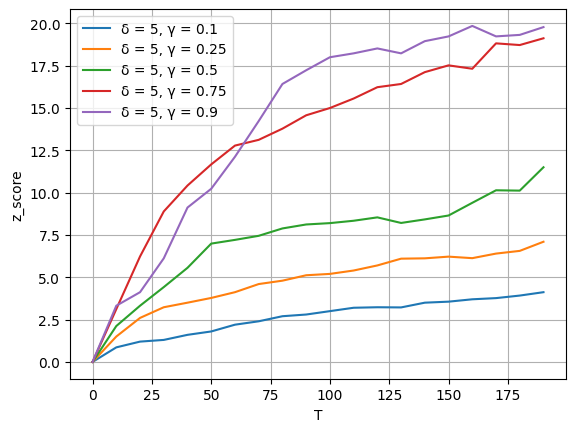

In [7]:
for j in gamma_list:
    filtered_df = df[(df.iloc[:, 1] == 5) & (df.iloc[:, 0]== j)]
    x = filtered_df.iloc[:, 2]
    y = filtered_df.iloc[:, 3]
    # print(x)
    plt.plot(x, y, label='δ = {}, γ = {}'.format(5, j))
# 添加标签和标题
plt.xlabel('T')
plt.ylabel('z_score')
# plt.title('Plot of Filtered Data')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()

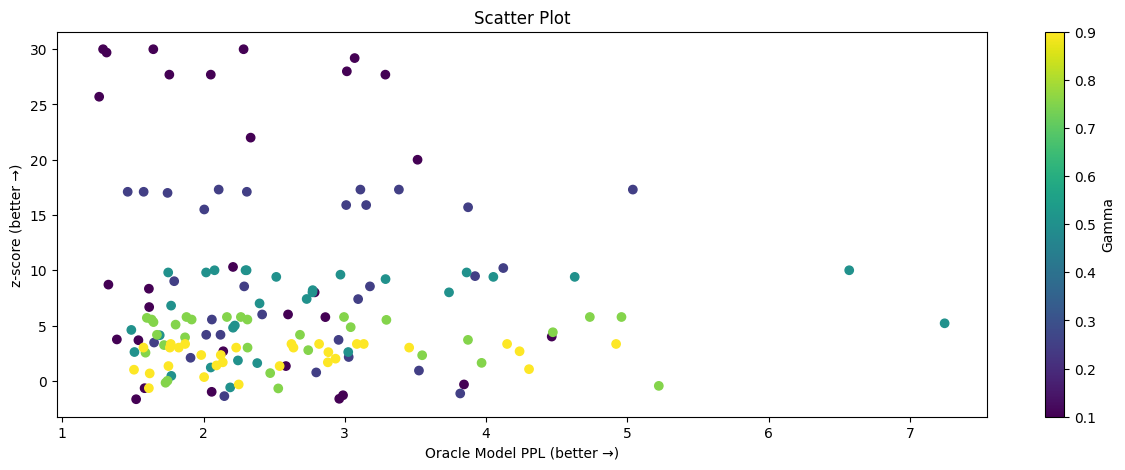

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 提取数据列
gamma = df.iloc[:, 0]
delta = df.iloc[:, 1]
T= df.iloc[:, 2]
z_score = df.iloc[:, 3]
ppl = df.iloc[:, 4]
# shape = {0:"*", 1:'D', 2:"p", 5:'h', 10:'o'}
# shape = ['*']*30+ ['D']*30+ ['*']*30+ ['*']*30+ ['*']*30
fig = plt.figure(figsize=(15,5))

# 调整颜色深浅与 gamma 值有关
plt.scatter(ppl, z_score, c=gamma, cmap='viridis')

# 添加颜色条
cbar = plt.colorbar()
cbar.set_label('Gamma')

# 添加标签和标题
plt.xlabel('Oracle Model PPL (better →)')
plt.ylabel('z-score (better →)')
plt.title('Scatter Plot')

# 显示图形
plt.show()


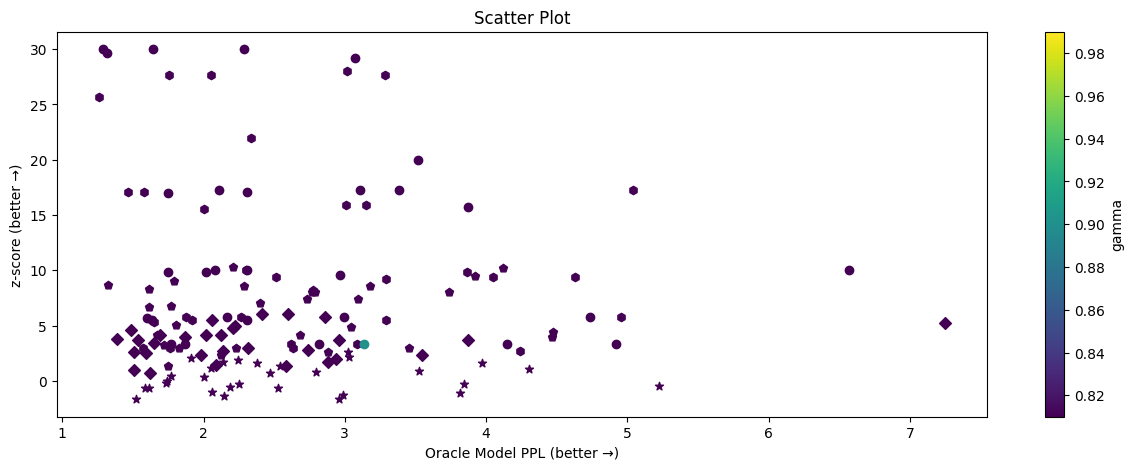

In [12]:
import matplotlib.pyplot as plt

# 假设 df 是你的 DataFrame，具有 x、y、label 和 color bar 列
# 例如，df = pd.read_csv('your_file.txt', delimiter='\t')

# 提取数据列
gamma = df.iloc[:, 0]
delta = df.iloc[:, 1]
T= df.iloc[:, 2]
z_score = df.iloc[:, 3]
ppl = df.iloc[:, 4]
shape = {0:"*", 1:'D', 2:"p", 5:'h', 10:'o'}
# shape = ["*",'D', "p", 'h', 'o']
fig = plt.figure(figsize=(15,5))
for i in range(len(gamma)):
    # for j in range(len(delta)):
    #     filtered_df = df[(df.iloc[:, 1] == delta[j]) & (df.iloc[:, 0]== gamma[i])]
    #     # print(filtered_df)
    #     x = filtered_df.iloc[:, 4]
    #     y = filtered_df.iloc[:, 3]
    #     plt.scatter(x, y, label='δ = {}'.format(delta[j]))
    #     # plt.scatter(x, y, c = [gamma[i]]*x.size, cmap='viridis', marker = shape[j],label='δ = {}'.format(delta[j]))
    #     # plt.scatter(x, y, c = [gamma[i]]*len(x), cmap='viridis', marker = shape[j],label='δ = {}'.format(delta[j]))
    # print(gamma[i])
    plt.scatter(ppl[i], z_score[i], c = gamma[i], cmap='viridis', label='δ = {}'.format(delta[i]), marker=shape[delta[i]])
plt.colorbar(label='gamma')
# 添加标签和标题
plt.xlabel('Oracle Model PPL (better →)')
plt.ylabel('z-score (better →)')
plt.title('Scatter Plot')
# 显示图形
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ModuleNotFoundError: No module named 'sklearn'